In [1]:
# Import
from keras.datasets import mnist

Read MNIST dataset
Create a function which takes this data, splits it into train and test and tell shape of each dataset

In [2]:
# prompt: Please give me code to read dataset from mnist and print shape of each dataset

from keras.datasets import mnist

# Read MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a function which takes this data, splits it into train and test and tell shape of each dataset
def print_shape(x_train, y_train, x_test, y_test):
  print("x_train shape:", x_train.shape)
  print("y_train shape:", y_train.shape)
  print("x_test shape:", x_test.shape)
  print("y_test shape:", y_test.shape)

print_shape(X_train, y_train, X_test, y_test)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Print some sample images , just to look at the dataset

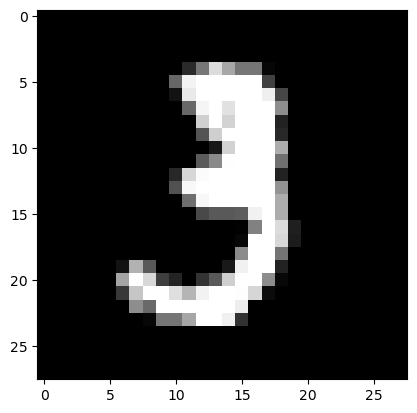

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure
plt.imshow(X_train[10],cmap='gray')
plt.show()

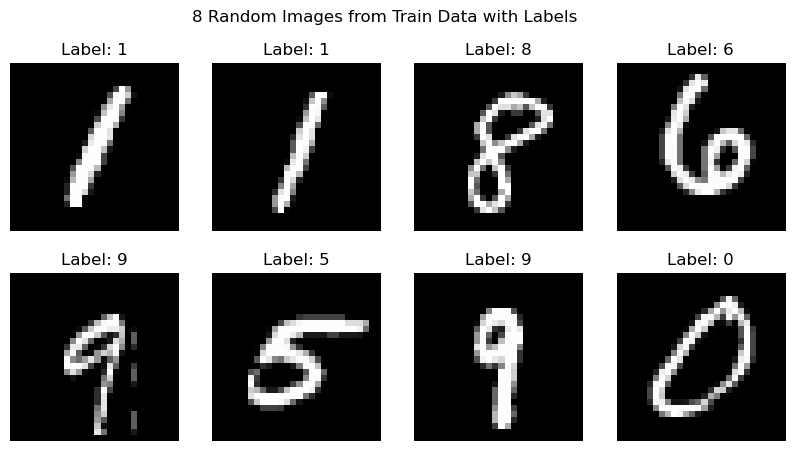

In [4]:
import random

# Select 8 random indices from the training set
random_indices = random.sample(range(len(X_train)), 8)

# Plot the images and their corresponding labels
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, index in enumerate(random_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")

plt.suptitle("8 Random Images from Train Data with Labels")
plt.show()

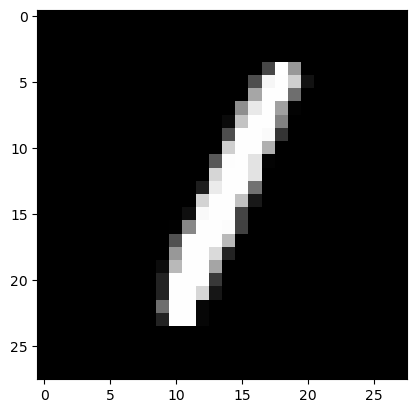

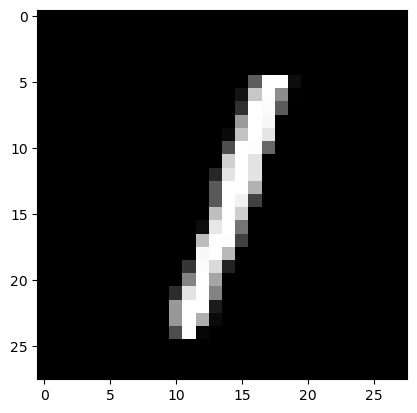

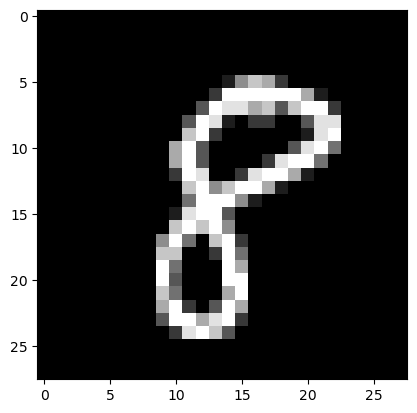

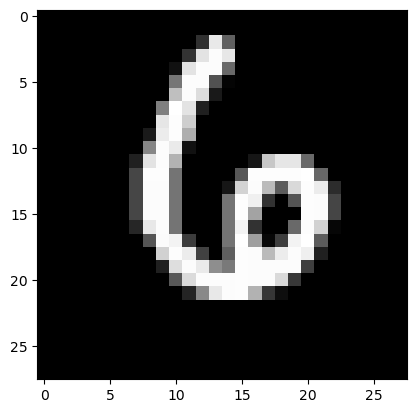

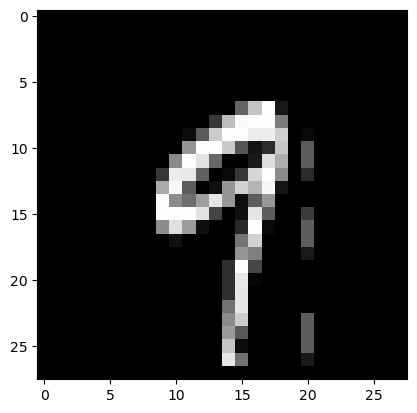

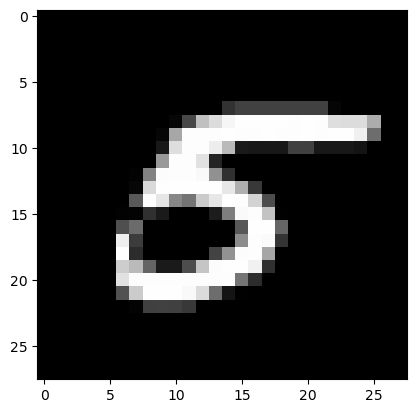

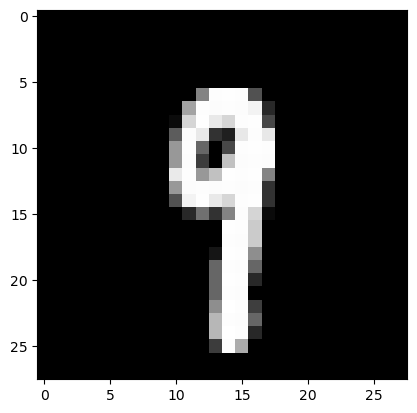

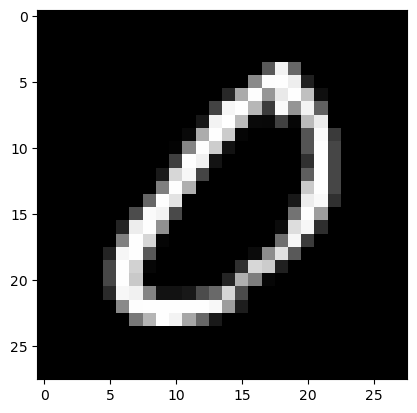

In [5]:
for i in random_indices:
  plt.imshow(X_train[i],cmap='gray')
  plt.show()

In [6]:
X_train[0].shape

(28, 28)

In [7]:
import numpy as np

In [8]:
np.max(X_train[0]),np.min(X_train[0])

(255, 0)

In [9]:
# Build a ANN model using this
# 28x28 =784
# reshape your data
# scale this data Min-Max scaling

# Model Parameters
NUM_ROWS = 28
NUM_COLS = 28

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))

#Scaling the data
X_train = X_train.astype('float32') / 255 #max scaling
X_test = X_test.astype('float32') / 255

In [10]:
np.max(X_train[0]),np.min(X_train[0])

(1.0, 0.0)

# Create a simple Neural Network Model which has

Input Layer
3 Hidden Layers - 64,32,16 neurons & uses relu activation
Output Layer ->

model.compile - Use adam optimiser, loss as per , accuracy as a metric

In [11]:
from keras import models
from keras.layers import Dense, Dropout


In [12]:
# Build neural network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
y_train[2]

4

In [15]:
from keras.utils import to_categorical
# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:

# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 799us/step - accuracy: 0.8679 - loss: 0.4508 - val_accuracy: 0.9549 - val_loss: 0.1525
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 816us/step - accuracy: 0.9627 - loss: 0.1245 - val_accuracy: 0.9596 - val_loss: 0.1345
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 768us/step - accuracy: 0.9719 - loss: 0.0914 - val_accuracy: 0.9698 - val_loss: 0.1030
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 805us/step - accuracy: 0.9777 - loss: 0.0702 - val_accuracy: 0.9737 - val_loss: 0.0923
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 965us/step - accuracy: 0.9805 - loss: 0.0613 - val_accuracy: 0.9711 - val_loss: 0.1069
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 819us/step - accuracy: 0.9833 - loss: 0.0510 - val_accuracy: 0.9719 - val_loss: 0.0971
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 829us/step - accuracy: 0.9852 - loss: 0.0451 - val_accuracy: 0.9747 - val_loss: 0.0949
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9874 - l

In [17]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8236 - loss: 0.5546 - val_accuracy: 0.9548 - val_loss: 0.1510
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9459 - loss: 0.1894 - val_accuracy: 0.9626 - val_loss: 0.1219
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9567 - loss: 0.1490 - val_accuracy: 0.9651 - val_loss: 0.1120
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9616 - loss: 0.1339 - val_accuracy: 0.9726 - val_loss: 0.0945
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9676 - loss: 0.1147 - val_accuracy: 0.9740 - val_loss: 0.0949
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9711 - loss: 0.1000 - val_accuracy: 0.9748 - val_loss: 0.0843
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9694 - loss: 0.1033 - val_accuracy: 0.9754 - val_loss: 0.0955
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9717 - loss: 0


**2. How can you implement this using a CNN - 5 minutes**




In [18]:
# We don't need to reshape our data
# CNNs are optimised for image input

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [19]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [20]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
del model

In [24]:
from keras import layers
model = models.Sequential(
    [
        #CNN
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        #bridge between CNNS and FC layers
        layers.Flatten(),

        # FC layers
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="softmax")


    ]
)



C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │        25,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,602 (174.23 KB)

 Trainable params: 44,602 (174.23 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [27]:
model.fit(x_train, y_train, batch_size=128, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7779 - loss: 0.7021 - val_accuracy: 0.9695 - val_loss: 0.0984
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9755 - loss: 0.0830 - val_accuracy: 0.9841 - val_loss: 0.0531
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9823 - loss: 0.0579 - val_accuracy: 0.9826 - val_loss: 0.0543
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9864 - loss: 0.0462 - val_accuracy: 0.9845 - val_loss: 0.0466
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9888 - loss: 0.0371 - val_accuracy: 0.9858 - val_loss: 0.0444


In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04442756250500679
Test accuracy: 0.98580002784729


In [30]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
predictions.shape

(10000, 10)

In [32]:
y_test.shape

(10000, 10)

In [33]:
predictions[0]

array([3.0231653e-10, 3.8070681e-07, 3.8635886e-07, 3.1028412e-07,
       1.3096453e-10, 2.2649294e-09, 7.4393532e-15, 9.9998987e-01,
       1.5976915e-09, 9.0293688e-06], dtype=float32)

In [34]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [35]:
np.argmax(predictions[10])

0

In [36]:
np.argmax(y_test[10])

0

In [37]:
for idx,i in enumerate(predictions[0]):
    if i == predictions[0].max():
        print(idx)


7
